In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [12]:
# url = "https://www.cryptodatadownload.com/cdd/Bitstamp_BTCUSD_1h.csv"
# r = requests.get(url, allow_redirects=True, verify=False)
# open('../raw_data/Bitstamp_BTCUSD_1h.csv', 'wb').write(r.content)

# get data

In [13]:
#!wget --no-check-certificate https://www.cryptodatadownload.com/cdd/Bitstamp_BTCUSD_1h.csv -O ./raw_data/Bitstamp_BTCUSD_1h.csv

In [16]:
def get_data():
    """return the data from cryptodownload.com"""    
    url = "https://www.cryptodatadownload.com/cdd/Bitstamp_BTCUSD_1h.csv"
    print('downloading data...')
    r = requests.get(url, allow_redirects=True, verify=False)
    
    print('writing data to file...')
    open('../raw_data/Bitstamp_BTCUSD_1h.csv', 'wb').write(r.content)
    
    print("finished!")
    btc = pd.read_csv("../raw_data/Bitstamp_BTCUSD_1h.csv", skiprows=1)
    btc.date = pd.to_datetime(btc.date)
    btc.set_index("date", inplace=True)
    return btc

In [17]:
btc = get_data()

downloading data...


/home/timjab92/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cryptodatadownload.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


writing data to file...
finished!


In [19]:
# btc = pd.read_csv("data/Bitstamp_BTCUSD_1h.csv", skiprows=1)
# btc.date = pd.to_datetime(btc.date)
# btc.set_index("date", inplace = True)

In [20]:
btc.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2022-02-18 00:00:00,1645142400,BTC/USD,40532.66,40626.09,40331.93,40519.70,14.258706,5.777585e+05
2022-02-17 23:00:00,1645138800,BTC/USD,40743.06,40791.91,40479.40,40556.11,61.323725,2.487052e+06
2022-02-17 22:00:00,1645135200,BTC/USD,40701.60,40795.49,40448.83,40734.52,45.824619,1.866644e+06
2022-02-17 21:00:00,1645131600,BTC/USD,40905.33,40976.59,40088.88,40710.07,258.324033,1.051639e+07
2022-02-17 20:00:00,1645128000,BTC/USD,41226.14,41226.14,40869.01,40905.33,148.157223,6.060420e+06


In [21]:
btc4h = btc.resample('4h').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last','Volume BTC': 'mean','Volume USD':'mean'})

In [22]:
btc4h

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2018-05-15 04:00:00,8733.86,8796.68,8707.28,8739.00,3.648501e+06,4.167550e+02
2018-05-15 08:00:00,8739.00,8865.00,8660.53,8760.00,5.881079e+06,6.713025e+02
2018-05-15 12:00:00,8760.00,8798.60,8467.42,8520.30,6.863415e+06,7.971725e+02
2018-05-15 16:00:00,8520.30,8589.10,8400.00,8555.60,5.126079e+06,6.021300e+02
2018-05-15 20:00:00,8555.60,8569.92,8420.37,8474.99,2.594374e+06,3.054825e+02
...,...,...,...,...,...,...
2022-02-17 08:00:00,43965.73,44046.19,42950.74,43208.04,1.069659e+02,4.629497e+06
2022-02-17 12:00:00,43191.99,43376.16,41700.00,41958.26,1.478788e+02,6.233623e+06
2022-02-17 16:00:00,41937.62,42141.99,40804.60,41236.60,1.505879e+02,6.258598e+06


In [28]:
CLOSE = 'log_close'

In [29]:
def feature_engineer(data):
    """
    Adds the EMAs, StochRSI, BollingerBands and Volume Rate of Change to the dataframe
    """
    add_logs(data)
    add_ema(data)
    add_stoch_rsi(data)
    add_bollinger(data,data[CLOSE])
#    add_vol_roc(data)
    data['4h Return'] = data[CLOSE].pct_change()
    data['4h Gradient'] = data[CLOSE].diff()
    data['boll_width'] = data['bollinger_up'] - data['bollinger_down']
    data['stoch_rsi'] = (data['K'] + data['D']) / 2
    data['perc_bb'] = (data[CLOSE] - data['bollinger_down']) / (data['bollinger_up'] - data['bollinger_down'])
    data['diff'] = data[CLOSE].diff(1)

    return data

## add other features



def add_ema(data, tspan=[12,26,21,50,34,55,99,200]):
    """
    Adds Exponential Moving Averages (EMA) to the dataframe. The default timeframes are 12,26,20,50,34 and 55.
    """
    for t in tspan:
        data[f'ema{t}'] = data[CLOSE].ewm(span=t).mean()
        data[f'dist_ema{t}'] = data[CLOSE] - data[f'ema{t}']
    return data


def computeRSI(data, window=14):
    """
    Computes the Relative Stregth Index for a given dataset and the window can be defined. Its default value is 14.
    """
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=window-1 so we get decay alpha=1/window
    up_chg_avg   = up_chg.ewm(com=window-1 , min_periods=window).mean()
    down_chg_avg = down_chg.ewm(com=window-1 , min_periods=window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

def add_logs(data):
    for i in ['open', 'high', 'low', 'close']:
        data[f'log_{i}'] = data[i].apply(lambda x: np.log(x))


def stoch_rsi(rsi, d_window=3, k_window=3, window=14):
    """
    Computes the stochastic RSI. Default values are d=3, k=3, window=14.
    """
    minrsi = rsi.rolling(window=window, center=False).min()
    maxrsi = rsi.rolling(window=window, center=False).max()
    stoch = ((rsi - minrsi) / (maxrsi - minrsi)) * 100
    K = stoch.rolling(window=k_window, center=False).mean()
    D = K.rolling(window=d_window, center=False).mean() 
    return K, D  


def add_stoch_rsi(data, d_window=3, k_window=3, window=14):
    data['rsi'] = computeRSI(data[CLOSE], window)
    data['K'], data['D'] = stoch_rsi(data['rsi'], d_window, k_window, window)
    return data


def get_bollinger_bands(prices, rate=20):
    sma = prices.rolling(rate).mean() # <-- Get SMA for 20 days
    std = prices.rolling(rate).std() # <-- Get rolling standard deviation for 20 days
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return sma, bollinger_up, bollinger_down


def add_bollinger(data, prices, rate=20):
    data['sma'], data['bollinger_up'], data['bollinger_down'] = get_bollinger_bands(prices)
    for i in ['bollinger_up', 'bollinger_down']:
        data[f'dist_{i}'] = data[CLOSE] - data[i]
    return data


#def add_vol_roc(data):
#    data['vol_roc'] = data.volume.pct_change()
#    return data


In [ ]:
def plot_loss_mae(history):
    
    fig, ax =plt.subplots(1,2,figsize=(20,5))
    
    # --- LOSS
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(['Train', 'Val'], loc='upper right')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
#     # --- MAE

    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('Model MAE', fontsize = 18)
    ax[1].set_xlabel('Epoch', fontsize = 14)
    ax[1].set_ylabel('Recall', fontsize = 14)
    ax[1].legend(['Train', 'Val'], loc='lower right') 
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)   
    
    plt.show()
    

In [30]:
data = feature_engineer(btc4h).dropna().copy()

In [31]:
np.exp(11.5)

98715.7710107605

<AxesSubplot:xlabel='date'>

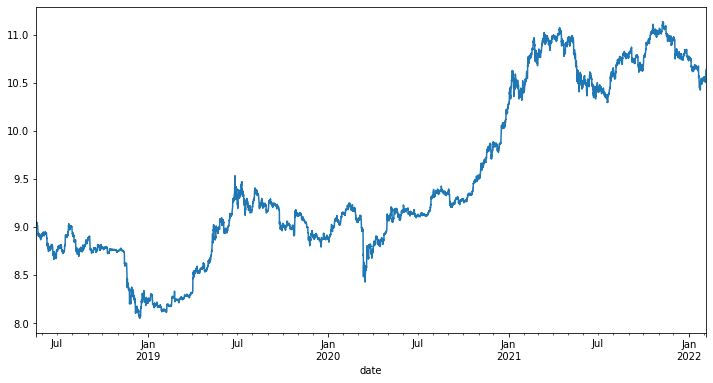

In [32]:
data.log_close.plot(figsize=(12,6))

In [33]:
data.keys()

Index(['open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD', 'log_open',
       'log_high', 'log_low', 'log_close', 'ema12', 'dist_ema12', 'ema26',
       'dist_ema26', 'ema21', 'dist_ema21', 'ema50', 'dist_ema50', 'ema34',
       'dist_ema34', 'ema55', 'dist_ema55', 'ema99', 'dist_ema99', 'ema200',
       'dist_ema200', 'rsi', 'K', 'D', 'sma', 'bollinger_up', 'bollinger_down',
       'dist_bollinger_up', 'dist_bollinger_down', '4h Return', '4h Gradient',
       'boll_width', 'stoch_rsi', 'perc_bb', 'diff'],
      dtype='object')

In [34]:
# selected_features = [CLOSE, 'log_open', 'log_high', 'log_low', 'Volume BTC',
#        'dist_ema12','dist_ema26', 'dist_ema21', 'dist_ema50', 'dist_ema34', 'dist_ema55', 'dist_ema99', 'dist_ema200',
#         'rsi', 'dist_bollinger_up','dist_bollinger_down', 
#        'stoch_rsi']
# selected_data = data[selected_features]

In [35]:
selected_features = [CLOSE, 'log_open', 'log_high', 'log_low', 'Volume BTC',
       'dist_ema12','dist_ema26', 'dist_ema21', 'dist_ema50', 'dist_ema34', 'dist_ema55', 'dist_ema99', 'dist_ema200',
        'rsi', 'bollinger_up','bollinger_down', 
       'stoch_rsi']
selected_data = data[selected_features]

In [36]:
selected_data.head()

,log_close,log_open,log_high,log_low,Volume BTC,dist_ema12,dist_ema26,dist_ema21,dist_ema50,dist_ema34,dist_ema55,dist_ema99,dist_ema200,rsi,bollinger_up,bollinger_down,stoch_rsi
date,,,,,,,,,,,,,,,,,
2018-05-20 08:00:00,9.028448,9.020044,9.032999,9.017674,2.193941e+06,0.008886,0.009364,0.009552,0.008137,0.008922,0.007943,0.006907,0.006106,52.222233,9.038490,8.989718,83.042516
2018-05-20 12:00:00,9.033269,9.028448,9.033280,9.020372,3.250198e+06,0.011589,0.013044,0.013008,0.012265,0.012827,0.012112,0.011246,0.010540,54.625042,9.040707,8.989063,88.740447
2018-05-20 16:00:00,9.049824,9.033269,9.053896,9.032392,2.803750e+06,0.023800,0.027234,0.026766,0.027300,0.027440,0.027224,0.026682,0.026160,61.740533,9.046176,8.986188,95.460368
2018-05-20 20:00:00,9.049993,9.049824,9.058354,9.045764,1.415755e+06,0.020271,0.025226,0.024396,0.026039,0.025801,0.026034,0.025792,0.025442,61.806400,9.050880,8.984005,98.540674
2018-05-21 00:00:00,9.047148,9.049993,9.053687,9.040082,1.773170e+06,0.014738,0.020612,0.019526,0.022002,0.021465,0.022055,0.022059,0.021853,59.936413,9.055037,8.983664,97.828917


In [37]:
train_percentage = 0.8
split = int(len(selected_data) * train_percentage)
split

6512

In [38]:
data_train = selected_data[:split]
data_test = selected_data[split:]

In [39]:
data_test

,log_close,log_open,log_high,log_low,Volume BTC,dist_ema12,dist_ema26,dist_ema21,dist_ema50,dist_ema34,dist_ema55,dist_ema99,dist_ema200,rsi,bollinger_up,bollinger_down,stoch_rsi
date,,,,,,,,,,,,,,,,,
2021-05-09 16:00:00,10.956976,10.958407,10.966768,10.952931,47.241351,-0.008665,-0.002147,-0.004529,0.007875,0.001482,0.009532,0.017107,0.021526,49.321984,10.995739,10.925029,24.015356
2021-05-09 20:00:00,10.973447,10.956848,10.976796,10.955842,74.351769,0.006605,0.013263,0.010857,0.023391,0.016927,0.025074,0.032906,0.037619,55.264718,10.997042,10.925700,18.746207
2021-05-10 00:00:00,10.992327,10.973977,10.993681,10.969971,143.578334,0.021564,0.029762,0.027033,0.040613,0.033761,0.042384,0.050750,0.055936,60.921485,11.000353,10.927988,38.601524
2021-05-10 04:00:00,10.975235,10.992634,10.995461,10.975205,173.728448,0.003784,0.011732,0.009038,0.022599,0.015717,0.024389,0.032985,0.038458,54.235390,11.000668,10.931090,53.881706
2021-05-10 08:00:00,10.971568,10.975673,10.979315,10.957788,150.375596,0.000099,0.007467,0.004882,0.018190,0.011361,0.019982,0.028732,0.034445,52.894132,10.998168,10.937863,57.224984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-04 08:00:00,10.540766,10.542489,10.552223,10.540419,55.378927,0.009572,0.006627,0.007255,0.004695,0.006184,0.003765,-0.012303,-0.064029,53.029873,10.576993,10.499430,60.646852
2022-02-04 12:00:00,10.583831,10.541497,10.592662,10.527419,339.976783,0.044539,0.046011,0.045745,0.045887,0.046435,0.045157,0.030147,-0.020755,66.415211,10.582603,10.496445,79.439080
2022-02-04 16:00:00,10.615141,10.584098,10.619215,10.583479,266.810857,0.064180,0.071594,0.070050,0.074170,0.073302,0.073736,0.060228,0.010449,72.541774,10.596737,10.488035,89.193146


In [40]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler(feature_range = (0,1))
minmax_scaler.fit(data_train)

data_train_scaled = minmax_scaler.transform(data_train)
data_test_scaled = minmax_scaler.transform(data_test)

In [41]:
min1 = minmax_scaler.data_min_[0]
range1 = minmax_scaler.data_range_[0]

## nonscaled

In [42]:
# window_size = 18#36  # test with small window size         #60
# horizon = 3 #number of predictions into the future :) 
# data_train_subsequences = []
# fake_y_train = []
# for k in range(len(data_train)-(window_size)-(horizon-1)):
#     data_train_subsequences.append(data_train[k:k+window_size])
#     fake_y_train.append(data_train[k+window_size:k+window_size+horizon]) #add [0] for log_price to be predicted

## scaled

In [43]:
7*24 / 4

42.0

window_size is about how many timeframes our prediction is based on. If WS = 18: 18*4 = 72h = 3d

In [44]:
window_size = 42#36  # test with small window size         #60
horizon = 6 #number of predictions into the future :) 

# data_train_subsequences = []
# fake_y_train = []
# for k in range(len(data_train_scaled)-(window_size)-(horizon-1)):
#     data_train_subsequences.append(data_train_scaled[k:k+window_size])
#     fake_y_train.append(data_train_scaled[k+window_size:k+window_size+horizon]) #add [0] for log_price to be predicted

# X_train = np.array(data_train_subsequences)[:,:,1:]
# y_train = np.array(fake_y_train)[:,:,0] #.reshape(-1,1)

In [45]:
def get_sequences(data, window_size=window_size, horizon=horizon):
    fake_x = []
    fake_y = []
    for i in range(len(data) - window_size - horizon - 1):
        fake_x.append(data[i:i+window_size])
        fake_y.append(data[i+window_size:i+window_size+horizon])
    x = np.array(fake_x)[:,:,:]
    y = np.array(fake_y)[:,:,0]
    return x, y
    

In [46]:
X_train, y_train = get_sequences(data_train_scaled)
X_train.shape, y_train.shape

((6463, 42, 17), (6463, 6))

In [47]:
X_test, y_test = get_sequences(data_test_scaled)
X_test.shape, y_test.shape

((1580, 42, 17), (1580, 6))

In [48]:
# #with the same window_size & horizon as the train data
# data_test_subsequences = []
# fake_y_test = []
# for k in range(len(data_test)-(window_size-1)-horizon):
#     data_test_subsequences.append(data_test[k:k+window_size])
#     fake_y_test.append(data_test[k+window_size:k+window_size+horizon])

In [49]:
# X_test = np.array(data_test_subsequences)[:,:,1:]
# y_test = np.array(fake_y_test)[:,:,0] #.reshape(-1,1)

In [50]:
#from tensorflow.keras import metrics
#my_mae = metrics.MeanAbsoluteError(name='mean_absolute_error', dtype=None)

In [74]:
[2**i for i in range(15)]

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

In [75]:
from tensorflow.keras.regularizers import L2

In [76]:
32+16

48

In [227]:
# from tensorflow.keras import Sequential, layers
# #from tensorflow.keras.layers import Normalization

# #normalizer = Normalization()
# #normalizer.adapt(X_train)

# # Build the LSTM model
# model = Sequential()
# #model.add(normalizer)

# model.add(layers.LSTM(units=64,
#                      return_sequences = True,
#                      activation = "tanh",
#                      input_shape = X_train[0].shape))

# model.add(layers.LSTM(units=48,
#                       return_sequences = False,
#                       activation = "relu" 
#                      ))

# model.add(layers.Dense(32, activation = "relu")) #, kernel_regularizer='l2'
# model.add(layers.Dense(8, activation="tanh"))
# #model.add(layers.Dense(8, activation="relu",kernel_regularizer='l2'))
# model.add(layers.Dense(horizon, activation = "linear"))

# model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 42, 64)            20992     
                                                                 
 lstm_9 (LSTM)               (None, 48)                21696     
                                                                 
 dense_12 (Dense)            (None, 32)                1568      
                                                                 
 dense_13 (Dense)            (None, 8)                 264       
                                                                 
 dense_14 (Dense)            (None, 6)                 54        
                                                                 
Total params: 44,574
Trainable params: 44,574
Non-trainable params: 0
_________________________________________________________________


In [115]:
from tensorflow.keras import Sequential, layers
#from tensorflow.keras.layers import Normalization

#normalizer = Normalization()
#normalizer.adapt(X_train)

# Build the LSTM model
model = Sequential()
#model.add(normalizer)

model.add(layers.LSTM(units=16,
                     return_sequences = True,
                     activation = "tanh",
                     input_shape = X_train[0].shape))

model.add(layers.LSTM(units=8,
                      return_sequences = False,
                      activation = "relu" 
                     ))


model.add(layers.Dense(horizon, activation = "linear"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 42, 16)            2176      
                                                                 
 lstm_9 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 3,030
Trainable params: 3,030
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(loss="mse",
             optimizer = "adam",#rmsprop
             metrics = "mae"#[my_mae]
             )

In [117]:
from tensorflow.keras.callbacks import EarlyStopping 

es = EarlyStopping(patience = 5, 
                   restore_best_weights= True,
                   monitor = "mae"
                  )

history = model.fit(X_train, y_train,
          validation_split = 0.3,
         batch_size=16,
         epochs=50,
         verbose = 2,
         callbacks = [es]
                   )

Epoch 1/50
283/283 [==============================] - 18s 50ms/step - loss: 0.0098 - mae: 0.0594 - val_loss: 0.0332 - val_mae: 0.1181
Epoch 2/50
283/283 [==============================] - 14s 48ms/step - loss: 3.8083e-04 - mae: 0.0143 - val_loss: 0.0236 - val_mae: 0.0986
Epoch 3/50
283/283 [==============================] - 13s 47ms/step - loss: 2.2213e-04 - mae: 0.0108 - val_loss: 0.0189 - val_mae: 0.0872
Epoch 4/50
283/283 [==============================] - 13s 45ms/step - loss: 1.9138e-04 - mae: 0.0099 - val_loss: 0.0167 - val_mae: 0.0818
Epoch 5/50
283/283 [==============================] - 13s 45ms/step - loss: 1.6937e-04 - mae: 0.0092 - val_loss: 0.0192 - val_mae: 0.0926
Epoch 6/50
283/283 [==============================] - 13s 44ms/step - loss: 1.6095e-04 - mae: 0.0089 - val_loss: 0.0175 - val_mae: 0.0856
Epoch 7/50
283/283 [==============================] - 13s 46ms/step - loss: 1.5329e-04 - mae: 0.0087 - val_loss: 0.0159 - val_mae: 0.0802
Epoch 8/50
283/283 [==================

In [129]:
#model.save('saved_model/lstm_16_8')

In [130]:
# from tensorflow.keras.models import load_model 
# model = load_model('saved_model/model_2')

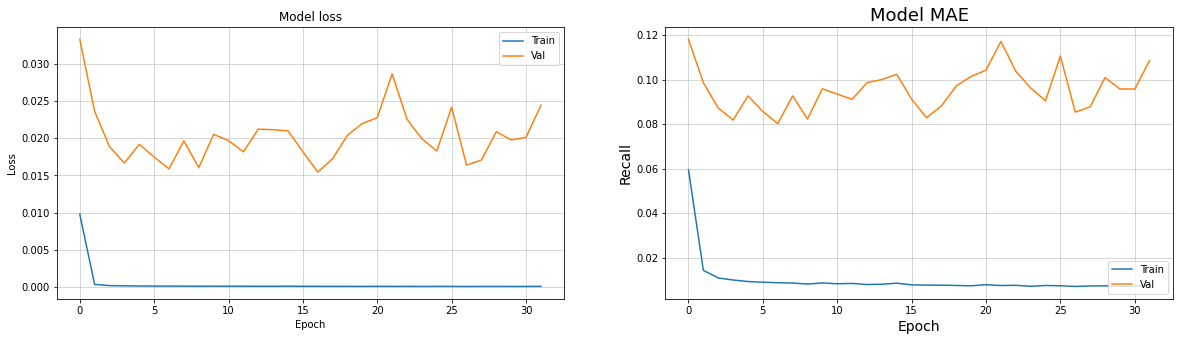

In [131]:
plot_loss_mae(history)

In [132]:
res = model.evaluate(X_test, np.array(y_test), verbose = 1)
res

50/50 [==============================] - 1s 12ms/step - loss: 0.0367 - mae: 0.1850


[0.03666531667113304, 0.18495456874370575]

In [133]:
predictions = model.predict(X_test)

In [134]:
y_test_unscaled = y_test * range1 + min1
y_test_unscaled.shape, y_test_unscaled.shape

((1580, 6), (1580, 6))

In [135]:
predictions_unscaled = predictions * range1 + min1

In [136]:
pred = pd.DataFrame(predictions_unscaled, columns = ['pred_1','pred_2','pred_3','pred_4','pred_5','pred_6']) #,'pred_2','pred_3''pred_4','pred_5','pred_6'
test = pd.DataFrame(y_test_unscaled, columns = ['test_1','test_2','test_3', 'test_4','test_5','test_6']) #,,'test_2','test_3', 'test_4','test_5','test_6'
result = pd.concat([pred, test], axis=1)

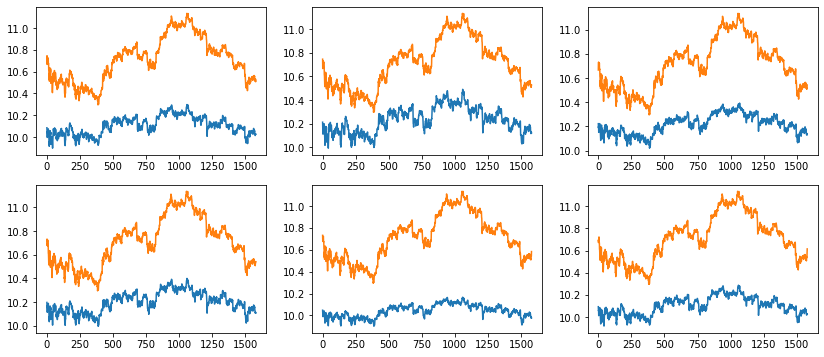

In [137]:
def plot_result(result, horizon=horizon):
    fig, axs = plt.subplots(2,3, figsize=(14,6)) if horizon > 3 else plt.subplots(1,3, figsize=(14,6))

    for i in range(horizon):
        if i<3:
            axs[0,i].plot(result[[f'pred_{i+1}',f'test_{i+1}']])
        else:
            axs[1,i-3].plot(result[[f'pred_{i+1}',f'test_{i+1}']])
            
plot_result(result)

In [138]:
def add_weights(result):
    for i in range(horizon):
        weight = np.mean(result[f'test_{i+1}'] - result[f'pred_{i+1}'])
        result[f'heavy_pred_{i+1}'] = result[f'pred_{i+1}'] + weight
        
    return result, weight

In [139]:
add_weights(result)[0]

,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,test_1,test_2,test_3,test_4,test_5,test_6,heavy_pred_1,heavy_pred_2,heavy_pred_3,heavy_pred_4,heavy_pred_5,heavy_pred_6
0,10.085053,10.211054,10.222442,10.197327,10.047625,10.093939,10.726566,10.746019,10.666426,10.718329,10.732127,10.677042,10.690015,10.689509,10.714590,10.705814,10.715017,10.697693
1,10.043888,10.165215,10.187269,10.158840,10.020428,10.056637,10.746019,10.666426,10.718329,10.732127,10.677042,10.697067,10.648849,10.643670,10.679418,10.667328,10.687820,10.660391
2,10.047446,10.170062,10.200417,10.166729,10.024594,10.061063,10.666426,10.718329,10.732127,10.677042,10.697067,10.682661,10.652408,10.648518,10.692565,10.675217,10.691987,10.664817
3,9.996022,10.109652,10.150587,10.114427,9.988775,10.013187,10.718329,10.732127,10.677042,10.697067,10.682661,10.710265,10.600984,10.588107,10.642735,10.622914,10.656168,10.616941
4,10.026999,10.145573,10.194572,10.151485,10.012796,10.043403,10.732127,10.677042,10.697067,10.682661,10.710265,10.718855,10.631961,10.624028,10.686721,10.659973,10.680189,10.647157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,10.013745,10.114471,10.129943,10.107777,9.978301,10.018188,10.520160,10.513403,10.517340,10.507314,10.527288,10.528017,10.618707,10.592927,10.622091,10.616264,10.645694,10.621942
1576,10.023002,10.122463,10.137709,10.114249,9.982388,10.025806,10.513403,10.517340,10.507314,10.527288,10.528017,10.542490,10.627963,10.600919,10.629857,10.622737,10.649780,10.629560
1577,10.023516,10.120421,10.134354,10.110691,9.980278,10.025208,10.517340,10.507314,10.527288,10.528017,10.542490,10.540766,10.628477,10.598877,10.626502,10.619179,10.647671,10.628962
1578,10.030572,10.127029,10.140087,10.115438,9.983707,10.031281,10.507314,10.527288,10.528017,10.542490,10.540766,10.583831,10.635533,10.605485,10.632236,10.623926,10.651100,10.635035


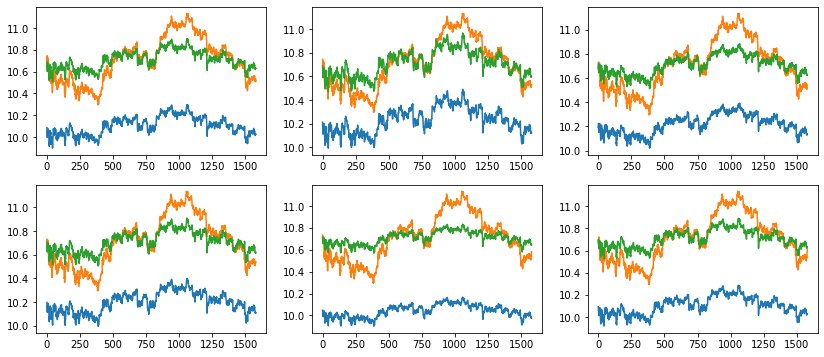

In [140]:
fig, axs = plt.subplots(2,3, figsize=(14,6)) if horizon > 3 else plt.subplots(1,3, figsize=(14,6))
for i in range(horizon):
    if i<3:
        axs[0,i].plot(result[[f'pred_{i+1}',f'test_{i+1}',f'heavy_pred_{i+1}']])
    else:
        axs[1,i-3].plot(result[[f'pred_{i+1}',f'test_{i+1}',f'heavy_pred_{i+1}']])

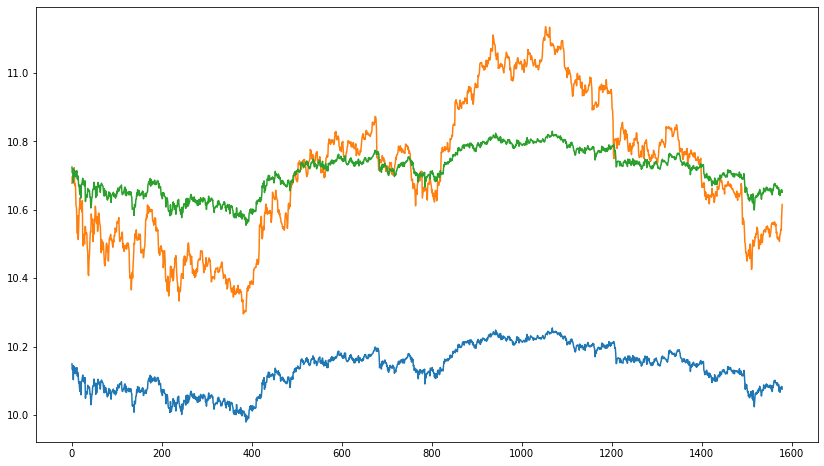

In [93]:
plt.figure(figsize=(14,8))
plt.plot(result[[f'pred_{horizon}',f'test_{horizon}',f'heavy_pred_{horizon}']])
plt.show()

In [94]:
result_exp = result.apply(lambda x: np.exp(x))

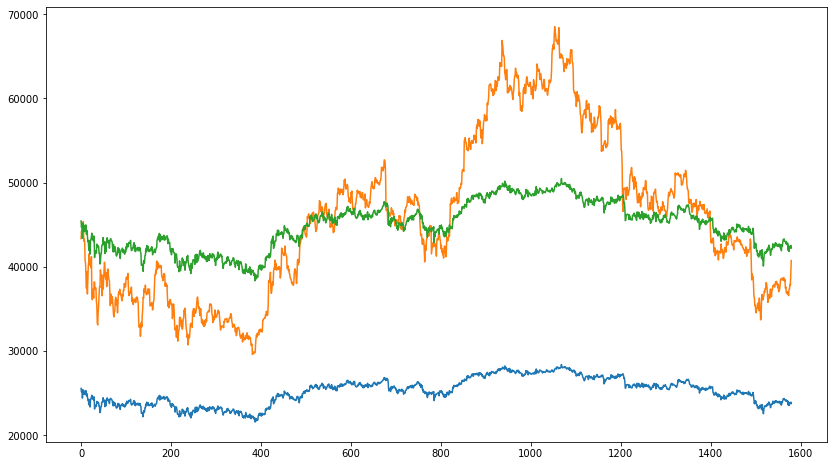

In [95]:
plt.figure(figsize=(14,8))
plt.plot(result_exp[[f'pred_{horizon}',f'test_{horizon}',f'heavy_pred_{horizon}']])
plt.show()

In [96]:
window_size

42

# make prediction

In [146]:
def make_pred(last_value = X_test[-1:], weights = True):
    pred = np.exp(model.predict(last_value)[:,-1] * range1 + min1 + add_weights(result)[1])
    if weights==False:
            pred = np.exp(model.predict(last_value)[:,-1] * range1 + min1)
        
    return pred

In [147]:
np.exp((model.predict(X_test[-1:]) * range1 + min1) + add_weights(result)[1])

array([[41348.375, 45424.867, 45952.83 , 44833.016, 39408.04 , 41352.36 ]],
      dtype=float32)

In [148]:
make_pred()

array([41352.36], dtype=float32)

In [149]:
make_pred(weights=False)

array([22609.62], dtype=float32)